# Theory and Applications of Data Analytics (LDSCI7236)

### AE2 Sentiment 

#### Student ID: 23220052

## I - Exploratory data analysis (30 marks).

Before starting the assignment, we will be importing all libraries and packages required for our programme solution

- "import os" module to use the operating system dependent functionality allowing us to interact with file systems, manipulate paths and perform operating system-related tasks. (Python documentation, 2024)
- "import urllib" module to retrieve/fetch/workwith data from URLs (Python documentation, 2024)
- "import time" module to work with time-related functions (Python documentation, 2024)
- "import csv" module to work with Comma Separated Values files as well as read and write tabular data in CSV format (Python documentation, 2024)
- "import pandas as pd" library to manipulate and analyse data (W3 School, 2024) 
- "import numpy as np" library to perform mathematical operations (W3 School, 2024) 
- "import statistics" module to calculate mathematical statistics of numeric data (Python documentation, 2024)
- "import seaborn as sns" data visualization library (based on Matplotlib) to make statistical graphics, explore and understand the data (Seaborn documentation, 2024) 
- "import matplotlib.pyplot as plt" module to create different types of plots and charts (Matplotlib documentation, 2024)
- "import request" module to allow us to send HTTP requests (SitePoint, 2024)
- "import zipfile" module to create, read, write and list contents of ZIP archives/files (Real Python, 2023)
- "import re" module to provide regular expression matching operations(Re, 2024) 
- "import pickle" module for serializing and deserializing Python objects (Python documentation, 2024)
- "from sklearn.feature_extraction.text import TfidfVectorizer" to convert a collection of raw documents to a matrix of TF-IDF features (scikit, 2024)
- "from sklearn.linear_model import LogisticRegression" to use Logistic Regression classifier (scikit, 2024)
- "from sklearn.model_selection import train_test_split" to split arrays or matrices into random train and test subsets (scikit, 2024)
- "from sklearn.naive_bayes import MultinomialNB" to use Naive Bayes classifier for multinomial models (scikit, 2024)
- "from sklearn.metrics import classification_report" to build a text report showing the main classification metrics (scikit, 2024)
- "from sklearn.feature_extraction.text import CountVectorizer" to convert a collection of text documents to a matrix of token counts (scikit, 2024)
- "from sklearn.metrics import accuracy_score" for accuracy classification score (scikit, 2024)

In [1]:
#We first import all libraries and packages 

import os 
import urllib
import time 
import csv
import pandas as pd
import numpy as np
import statistics 
import seaborn as sns 
import matplotlib.pyplot as plt
import requests
import zipfile
import re
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

To perform an exploratory data analysis (EDA) on the SST-2 dataset, we need to start by loading and examining the data from our files of interest : the train.tsv and dev.tsv files. 

#### a) Explore the distribution of positive and negative reviews in the SST-2 dataset. 

In order to explore the distribution of positive and negative reviews in the SST-2 dataset, we develop a code to process the downloading, extracting, and preparing of SST-2 dataset for further use.

In [2]:
#URL of the SST-2 dataset
sst_url = "https://dl.fbaipublicfiles.com/glue/data/SST-2.zip"

#We then send an HTTP GET request to download the SST-2 dataset
response = requests.get(sst_url)

#We check if the request was successful (status code 200)
if response.status_code == 200:
    #We open a file in binary write mode to save the downloaded dataset
    with open("SST-2.zip", "wb") as f:
        #We write the contents of the response to the file
        f.write(response.content)
    #We print message indicating successful download
    print("SST-2 dataset downloaded successfully.")
else:
    #Or a message indicating failure to download with status code
    print("Failed to download SST-2 dataset. Status code:", response.status_code)

#We extract the contents of the downloaded ZIP file
with zipfile.ZipFile("SST-2.zip", "r") as zip_ref:
    #We extract all contents to a directory named "SST-2"
    zip_ref.extractall("SST-2")

#Finally, we define file paths for training and development sets
train_path = os.path.join("SST-2", "SST-2", "train.tsv")
dev_path = os.path.join("SST-2", "SST-2", "dev.tsv")


SST-2 dataset downloaded successfully.


##### Code explanation: 

The above code aims to download our dataset SST-2 (Stanford Sentiment Treebank 2) from a given URL, extract its contents, and then define file paths for its training and development sets. We first assign to our variable "sst_url" the URL where the SST-2 dataset is located. Then, using "requests.get(sst_url)", we send an HTTP GET request to our specified URL to retrieve the dataset. In a for loop, we check whether the HTTP request was successful (status code 200). If it is successful, the code proceeds to saving the dataset to a file named "SST-2.zip". Then, we ask the code to open the previous file in write mode. Please, note that "f.write(response.content)" writes the contents of the HTTP response to the file. Then, we ask the code to create a ZipFile object to work on the donwloaded ZIP file. All its content is extracted into a directory "SST-2" in our current notebook. Finally, we define the paths for our training and development set within the extracted dataset. 

Then, we need to convert the tab-separated training and development datasets into CSV format and saves them as separate files.

In [3]:
#We load train.tsv and dev.tsv into Dataframes

#We first read the train.tsv file into a dataframe
train_df = pd.read_csv(os.path.join("SST-2", "SST-2", "train.tsv"), sep='\t')

#We then read the dev.tsv file into another dataframe
dev_df = pd.read_csv(os.path.join("SST-2", "SST-2", "dev.tsv"), sep='\t')

#We then want to save train.tsv and dev.tsv as CSV files

#We save train_df as CSV file named "train.csv" 
train_df.to_csv("train.csv", index=False)

#We save dev_df as CSV file named "dev.csv" 
dev_df.to_csv("dev.csv", index=False)

#We finally print a message confirming the successful saving of datasets as CSV files
print("Train and dev datasets saved as CSV files successfully.")

Train and dev datasets saved as CSV files successfully.


##### Code explanation: 

The above code aims to load the training and development datasets (train.tsv and dev.tsv, respectively) into dataframes from their respective file paths. Once done, it saves them as CSV files (train.csv and dev.csv, respectively). We first use "pd.read_csv(os.path.join("SST-2", "SST-2", "train.tsv"), sep='\t')" to read the train.tsv file into a dataframe, by creating the file path from the "SST-2", "train.tsv", and "sep='\t'" which specifies that the data is tab-separated. We do the same for the dev.tsv file, so it reads it into another dataframe. Then, we save our train_df and dev_df respectively as separated CSV files. The "index=False" argument specifies that the index of the dataframes should not be saved to the CSV file. Finally, we print a message confirming that the datasets have been successfully saved as CSV files.

Now we have our two dataframes as per the below 

In [4]:
train_df

,sentence,label
0,hide new secretions from the parental units,0
1,"contains no wit , only labored gags",0
2,that loves its characters and communicates som...,1
3,remains utterly satisfied to remain the same t...,0
4,on the worst revenge-of-the-nerds clichés the ...,0
...,...,...
67344,a delightful comedy,1
67345,"anguish , anger and frustration",0
67346,"at achieving the modest , crowd-pleasing goals...",1
67347,a patient viewer,1


In [5]:
dev_df

,sentence,label
0,it 's a charming and often affecting journey .,1
1,unflinchingly bleak and desperate,0
2,allows us to hope that nolan is poised to emba...,1
3,"the acting , costumes , music , cinematography...",1
4,"it 's slow -- very , very slow .",0
...,...,...
867,has all the depth of a wading pool .,0
868,a movie with a real anarchic flair .,1
869,a subject like this should inspire reaction in...,0
870,... is an arthritic attempt at directing by ca...,0


Note 1: Upon reviewing our movie reviews dataset, we observed that the 'sentence' column contains punctuation, capital letters, and numeric values. Initially, we considered preprocessing and cleaning our data to address these elements. However, after careful consideration and examination of our CSV files, we determined that such preprocessing is unnecessary. Since our data will undergo tokenization during at a later phase, these elements would not significantly impact our results. Moreover, we also noticed the absence of missing labels and duplicates in our dataset. Therefore, we decided to proceed with the assignment without preprocessing the data, as we found no benefit to doing so. 

Now, from our above dataframes (train_df and dev_df), we will explore the positive and negative reviews for each dataframe respectively. 

For train_df : 

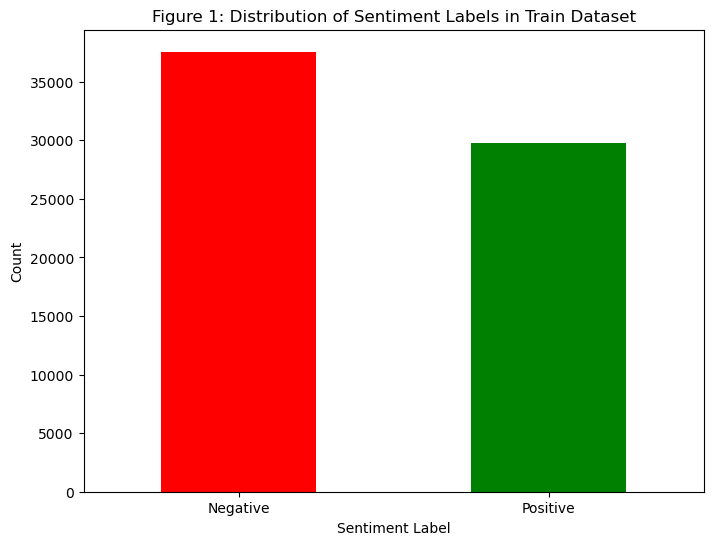

Number of positive reviews: 37569
Number of negative reviews: 29780


In [6]:
#We calculate the count of each unique value in the 'label' column
sentiment_counts_train = train_df['label'].value_counts()

#We plot the distribution of sentiment labels
#We set the figure size
plt.figure(figsize=(8, 6))
#We create a bar plot of sentiment label counts, with colors representing negative and positive sentiments
sentiment_counts_train.plot(kind='bar', color=['red', 'green'])
#We set plot title, x-axis label, and y-axis label
plt.title('Figure 1: Distribution of Sentiment Labels in Train Dataset')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
#Then, we set x-axis tick labels and their positions
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], rotation=0)
#Finally, we show the plot
plt.show()

#Then, we print the count of positive and negative reviews
#We access the count of positive sentiment reviews and print
print("Number of positive reviews:", sentiment_counts_train[1])
#Then, we access the count of negative sentiment reviews and print
print("Number of negative reviews:", sentiment_counts_train[0])

##### Code explanation: 

The above code performs data exploration and visualization on our training dataset (train_df). By using the "train_df['label'].value_counts()", this code calculates the count of each unique value in the 'label' column of the train_df dataframe. It provides insight into the distribution of sentiment labels (presumably positive (1) and negative (0)) in our dataset. Then, we ask the code to create a bar plot where sentiment labels are represented on the x-axis and their corresponding counts are represented on the y-axis. The colors red and green correspond to negative and positive sentiments, respectively. Finally, we ask the code to print the count of positive and negative sentiment reviews, respectively, based on the calculated sentiment counts stored in the sentiment_counts_train variable.

##### Discussion: 

From the above illustration, we notice that there are 37569 positive reviews and 29780 negative reviews. This means that, 37569 sentences or reviews are labelled as 1 (positive) while 29780 are labelled as 0 (negative). The above information provides insight into the distribution of sentiment labels in our training dataset. It suggests that there are more positive reviews than negative ones. Therefore, we can conclude that the movie had a more positive reception. 

However, we notice that there is an unequal distribution of positive and negative reviews which can suggest an imbalance in the training dataset. This can ulterly impact the training and performance of the model in a sentiment analysis task. Therefore, it is crucial to account for this disparity during model evaluation and selection to ensure the reliability and effectiveness of sentiment analysis results.

Now, we do exactly the same for dev_df

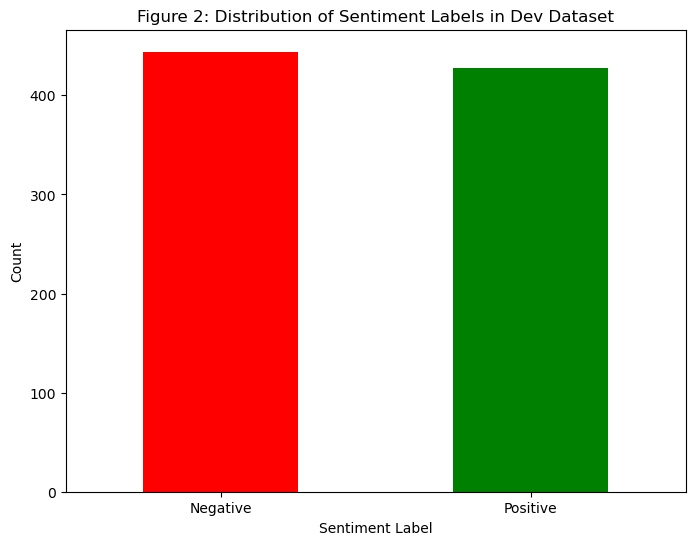

Number of positive reviews: 444
Number of negative reviews: 428


In [7]:
#We calculate the count of each unique value in the 'label' column
sentiment_counts_dev = dev_df['label'].value_counts()

#We plot the distribution of sentiment labels
#We set the figure size
plt.figure(figsize=(8, 6))
#We create a bar plot of sentiment label counts, with colors representing negative and positive sentiments
sentiment_counts_dev.plot(kind='bar', color=['red', 'green'])
#We set plot title, x-axis label, and y-axis label
plt.title('Figure 2: Distribution of Sentiment Labels in Dev Dataset')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
#Then, we set x-axis tick labels and their positions
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], rotation=0)
#Finally, we show the plot
plt.show()

#Then, we print the count of positive and negative reviews
#We access the count of positive sentiment reviews and print
print("Number of positive reviews:", sentiment_counts_dev[1])
#Then, we access the count of negative sentiment reviews and print
print("Number of negative reviews:", sentiment_counts_dev[0])

##### Code explanation: 

The above code performs data exploration and visualization on our development dataset (dev_df). By using the "dev_df['label'].value_counts()", this code calculates the count of each unique value in the 'label' column of the dev_df dataframe. It provides insight into the distribution of sentiment labels (presumably positive (1) and negative (0)) in our dataset. Then, we ask the code to create a bar plot where sentiment labels are represented on the x-axis and their corresponding counts are represented on the y-axis. The colors red and green correspond to negative and positive sentiments, respectively. Finally, we ask the code to print the count of positive and negative sentiment reviews, respectively, based on the calculated sentiment counts stored in the sentiment_counts_dev variable.

##### Discussion: 

From the above illustration, we notice that there are 444 positive reviews and 428 negative reviews. This means that, 444 sentences or reviews are labelled as 1 (positive) while 428 are labelled as 0 (negative). The above information provides insight into the distribution of sentiment labels in our development dataset. It suggests that there are more positive reviews than negative ones. Therefore, we can conclude that the movie had a more positive reception, which aligns with the outcome of our training dataset. 

However, we notice that there is an unequal distribution of positive and negative reviews which can suggest an imbalance in the training dataset. This can ulterly impact the training and performance of the model in a sentiment analysis task. Therefore, it is crucial to account for this disparity during model evaluation and selection to ensure the reliability and effectiveness of sentiment analysis results.

Finally, we notice that there is a difference in the count of positive and negative reviews for both datasets. This can be explained by the size of datasets. Indeed, our training dataset is larger than our development dataset which explains the smaller count of positive and negative reviews in our development dataset. 

#### b) Identify any data imbalances.

As per the above, we noticed that there is an imbalance in the size of our datasets as well as in their size of positive and negative reviews respectively. In this section, we aim to identify these data imbalances to get insights into the distribution of labels across both the training and development datasets, in order to understand the balance or imbalance of classes within each dataset.

We first want to check the imbalances and differences between the datasets. To do that, we calculate the counts of positive and negative entries in both the training and development datasets. 

In [8]:
#We want to count the number of positive and negative entries in the training and development datasets

#We first calculate the number of entries where 'label' column equals 1 (positive sentiment) and 0 (negative sentiment) in the training dataset
train_positive_count = (train_df['label'] == 1).sum()
train_negative_count = (train_df['label'] == 0).sum()

#We then calculate the number of entries where 'label' column equals 1 (positive sentiment) and 0 (negative sentiment) in the development dataset
dev_positive_count = (dev_df['label'] == 1).sum()
dev_negative_count = (dev_df['label'] == 0).sum()

#We print the counts of positive and negative entries in the training dataset
print("Training Data:")
print("Positive Entries:", train_positive_count)
print("Negative Entries:", train_negative_count)
#And calculate and print the absolute difference between the counts of positive and negative entries in the training dataset
print("Difference:", abs(train_positive_count - train_negative_count))

#We do the development dataset
print("\nDevelopment Data:")
print("Positive Entries:", dev_positive_count)
print("Negative Entries:", dev_negative_count)

print("Difference:", abs(dev_positive_count - dev_negative_count))

Training Data:
Positive Entries: 37569
Negative Entries: 29780
Difference: 7789

Development Data:
Positive Entries: 444
Negative Entries: 428
Difference: 16


##### Code explanation: 

The above code calculate the counts of positive and negative entries in both the training and development datasets. It assumes that the datasets are already loaded and that the 'label' column contains sentiment labels, with 0 representing negative sentiment and 1 representing positive sentiment. Indeed, we first calculate the number of entries in the training dataset where the 'label' column equals 1, indicating positive sentiment (stored in variable train_positive_count). It sums up all the True values resulting from the comparison. Then, we calculate the number of entries in the training dataset where the 'label' column equals 0, indicating negative sentiment (stored in train_negative_count variable). We then do the same for development dataset, where the number of positive entries is tored in dev_positive_count variable and the number of negative entries is stored in dev_negative_count variables. We finally print the results, along with the absolute difference between the counts for both training and development dataset. 

This way, we are able to understand the dataset characteristics before proceeding with sentiment analysis tasks. 

Then, we want to generate a bar plot that visually compares the counts of positive and negative entries between the training and development datasets. 

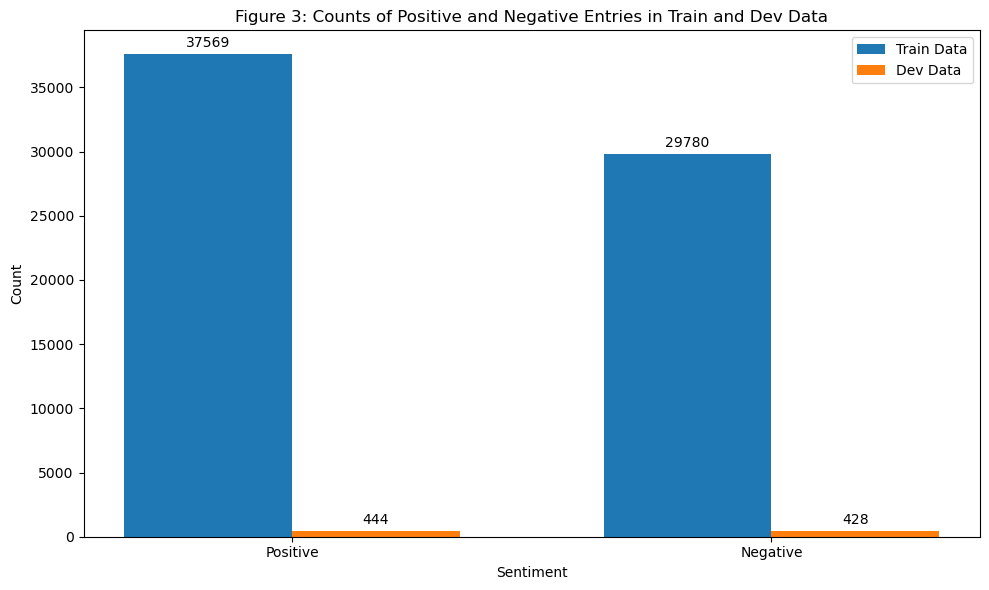

In [9]:
#We first define labels for the x-axis categories
train_labels = ['Positive', 'Negative']
dev_labels = ['Positive', 'Negative']

#As well as the counts of positive and negative entries in the training and development datasets
train_counts = [train_positive_count, train_negative_count]
dev_counts = [dev_positive_count, dev_negative_count]

#We then create a figure and axis object for the plot with a specified size
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
#And generate an index range for positioning the bars on the x-axis
index = range(len(train_labels))

#We then plot bars representing counts of positive and negative entries in the training dataset
train_bars = ax.bar(index, train_counts, bar_width, label='Train Data')
#As well as plot bars representing counts of positive and negative entries in the development dataset
dev_bars = ax.bar([i + bar_width for i in index], dev_counts, bar_width, label='Dev Data')

#We set labels for the x-axis and y-axis
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
#We set the title of the plot
ax.set_title('Figure 3: Counts of Positive and Negative Entries in Train and Dev Data')
#We set positions and labels for the ticks on the x-axis
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(train_labels)
#We display the legend indicating the bars representing the training and development datasets
ax.legend()

#We add counts above bars
for bars in [train_bars, dev_bars]:
    for bar in bars:
        height = bar.get_height()
        # Add text annotations above each bar to display its count
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#Then adjust subplot parameters to prevent overlapping
plt.tight_layout()
#Finally we display the plot
plt.show()

##### Code explanation: 
    
The above code generates a bar plot to visualize the counts of positive and negative entries in both the training and development datasets. To do that, we first give the code train_labels and dev_labels lists that contain labels for the x-axis categories, which are 'Positive' and 'Negative' in this case. Then, we provide train_counts and dev_counts lists that contain the counts of positive and negative entries in the training and development datasets, respectively. We then create a bar plot positioning the bars on the x-axis and plotting the bars representing the counts of positive and negative entries in the training and development dataset. Finally, we set labels for the x-axis and y-axis, respectively as well as the title of the plot, and a legend indicating the bars representing the training and development datasets. We also ask the code to iterate through the bars and adds text annotations above each bar to display its counts. Finally we adjust subplot parameters to prevent overlapping and display the plot.

##### Discussion: 
    
From the illustration above, for the training dataset, we see that there are 37569 reviews classified as positive sentiment and 29780 reviews classified as negative sentiment. However, the absolute difference between the counts of positive and negative entries is 7789. This suggests an imbalance in the distribution of sentiment labels within the training dataset, with a higher proportion of positive sentiment instances compared to negative sentiment instances. This imbalance could potentially affect the performance of models trained on this dataset, particularly in scenarios where balanced representation of classes is important for accurate predictions. This correspond to our previous analysis.

For the development data, we notice that there are 444 reviews classified as positive sentiment and 428 reviews classified as negative sentiment. The absolute difference between the counts of positive and negative entries is 16. Therefore, unlike the training dataset, the development dataset exhibits a relatively balanced distribution between positive and negative sentiment instances, with a minimal difference of 16 entries. This balanced distribution could potentially lead to more robust model evaluation and performance assessment on unseen data, as the model's predictions are tested on a dataset that is more representative of real-world sentiment distributions. This correspond to our previous analysis. 

Then, we check the distribution of labels in our train dataset then in our development dataset 

In [10]:
#We calculate the distribution of unique labels in the 'label' column of our training dataset,
#and normalize the counts to percentages
train_label_distribution = train_df['label'].value_counts(normalize=True) * 100

#We do the same for our development dataset
dev_label_distribution = dev_df['label'].value_counts(normalize=True) * 100

#We then print a header indicating the label distribution in our training dataset
print("Train Label Distribution (Percentages):")
#Then we print the calculated label distribution in our training dataset
print(train_label_distribution)

#We finally do the same for our development dataset
print("\nDev Label Distribution (Percentages):")
print(dev_label_distribution)

Train Label Distribution (Percentages):
label
1    55.782565
0    44.217435
Name: proportion, dtype: float64

Dev Label Distribution (Percentages):
label
1    50.917431
0    49.082569
Name: proportion, dtype: float64


##### Code explanation: 

Our above code aims to analyze the distribution of labels within our training and development dataset (train_df and dev_df, respectively). To do that, we ask the code to calculate the distribution of unique labels in the 'label' column of our training dataset (train_df). By setting normalize=True, the resulting counts are converted into percentages, representing the proportion of each label relative to the total number of instances in the dataset. We then do the same for our development dataset (dev_df). We then ask the code to print a header indicating the output that represtns the label distribution in the training and development dataset, as well as the calculated label distribution in the dataset respectively. Each unique label is displayed along with its corresponding percentage of occurrences. The "\n" is a newline character, ensuring that there is a blank line between the previous and following outputs.

Then we create a figure with two subplots, each displaying a bar chart of the label distribution for the training and development datasets, respectively, providing a visual comparison of the label proportions between the two datasets.

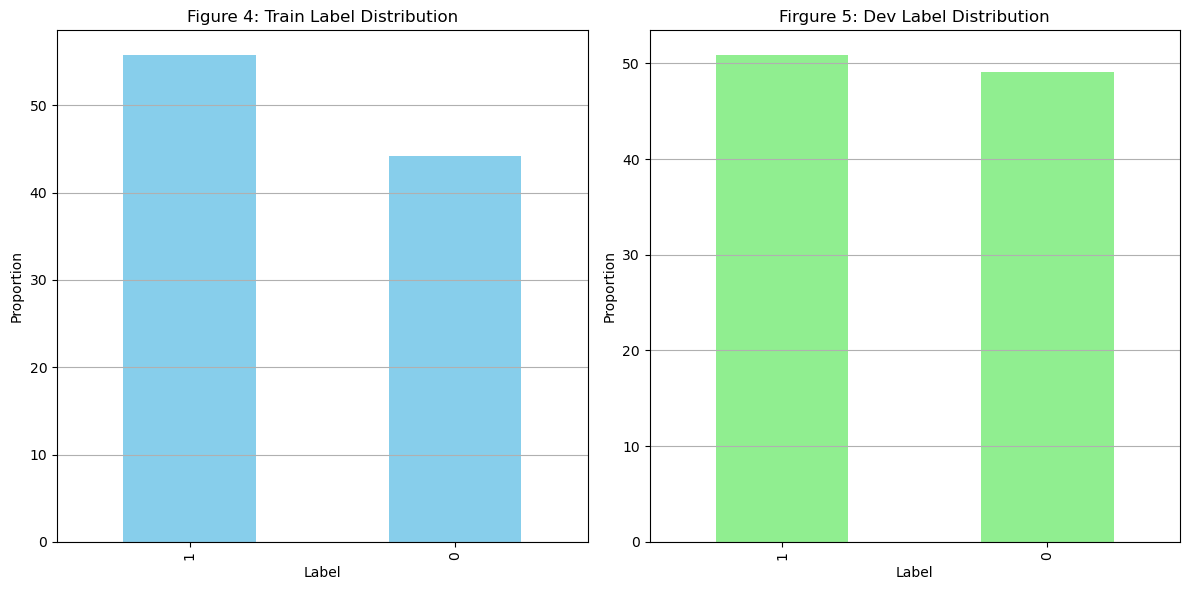

In [11]:
#We want to plot each dataset distribution for better visualization

#We create a figure and subplots layout with 1 row and 2 columns, and specify the figure size
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

#We plot the label distribution for the training dataset on the first subplot
train_label_distribution.plot(kind='bar', ax=ax[0], color='skyblue')
#We then set title, x-axis label, y-axis label, and grid for the first subplot
ax[0].set_title('Figure 4: Train Label Distribution')
ax[0].set_xlabel('Label')
ax[0].set_ylabel('Proportion')
ax[0].grid(axis='y')

#Secondly, we plot the label distribution for the development dataset on the second subplot
dev_label_distribution.plot(kind='bar', ax=ax[1], color='lightgreen')
#We then set title, x-axis label, y-axis label, and grid for the second subplot
ax[1].set_title('Firgure 5: Dev Label Distribution')
ax[1].set_xlabel('Label')
ax[1].set_ylabel('Proportion')
ax[1].grid(axis='y')

#Finally, we adjust subplot spacing to prevent overlap
plt.tight_layout()
#And display the plot
plt.show()

##### Code explanation: 

In the above code, we aim to visualize the distributions of label proportions for both the training and development datasets. We ask the code to provide us with a bar chart of the label distribution for the training dataset on the first subplot (ax[0]), we set a title to it, as well as the label for the x-axis and y-axis of the first subplot. With the "ax[0].grid(axis='y')", we ask the code to add gridlines along the y-axis of the first subplot to aid visualization. Then, we do the same for our development dataset, defined as the second subplot (ax[1]). We finally adjust the spacing between subplots to prevent overlap and display the entire figure containing both subplots. 

##### Discussion: 

From the above illustration, we notice that the majority of reviews in the training dataset are labeled as positive, constituting approximately 55.78% of the total dataset. On the other hand, the negative reviews make up the remaining proportion, accounting for approximately 44.22% of the dataset. Therefore, we conclude that there is a noticeable imbalance between the positive and negative labels (11.56%) in the training data, with the positive class being slightly overrepresented. This imbalance might be due to the higher amount of reviews, potentially leading to less accurate representation of sentiment proportions. In other words, this imbalance may potentially affect the model's learning process and performance, particularly in scenarios where the negative reviews are of interest.

Regarding the development dataset, the proportions are more balanced between the positive and negative labels. Indeed, the positive reviews make up approximately 50.92% of the dataset, while the negative ones account for the remaining proportion, approximately 49.08% of the dataset. Therefore, we conclude that the development dataset has a more balanced distribution of labels (1.84%). This more balanced distribution in the development dataset might be indicative of a more accurate representation of sentiment proportions. In other words, the development dataset shows a more balanced distribution between positive and negative reviews, which might indicate a better representation of real-world data.


It is important to note that the development dataset is typically a sample of the training dataset. While the training dataset would need more data for the model to train on and be more accurate, the development dataset is more suited for running the model's performance once it is trained.

#### c) Discuss potential implications for model training and evaluation.

As previously discussed, when identifying data imbalances in a dataset, particularly in the context of model training and evaluation for tasks like sentiment analysis, it is essential to consider several potential implications.

Indeed, imbalanced datasets can lead to biased models, where the model may be more inclined to predict the majority class. For instance, our training dataset contains significantly more positive reviews than negative ones, a model trained on this data may perform well on positive reviews but poorly on negative ones. This can result in skewed evaluation metrics, such as accuracy, precision, recall, and F1 score.

Moreover, imbalances make it harder for the model to learn from minority classes since there are fewer examples available for training. As a result, the model may struggle to correctly classify instances belonging to minority classes, leading to lower performance metrics for those classes.

Additionally, biased models trained on imbalanced datasets may not generalize well to real-world scenarios where class distributions differ. For instance, a sentiment analysis model trained on a dataset heavily skewed towards positive reviews such as our training dataset, may fail to accurately classify reviews in domains where negative sentiment is prevalent.

Finally, when evaluating model performance on imbalanced datasets, it is crucial to use appropriate evaluation metrics that consider class imbalances. Metrics like accuracy can be misleading, especially when the classes are heavily imbalanced. Instead, using metrics such as precision, recall and F1 score provide a more comprehensive understanding of model performance across different classes.

To address data imbalances during model training, it is crucial to oversample the minority class or undersampling the majority class to balance the dataset. Another method would be assigning higher weights to minority class samples during model training to give them more importance or generate synthetic data points for minority classes to increase their representation. 

To conclude, biased models trained on imbalanced data can perpetuate existing biases present in the data. Therefore, it is crucial to consider the ethical implications of deploying such models, especially in sentiment analysis, where biased predictions can impact user experiences and decision-making processes.

#### d) Apply appropriate visualisation of the data sets where necessary. 

Throughout the previous tasks, we have generated appropriate visualizations to help in the analysis and understanding of the datasets.

## II - The text vectorisation method of choice (20 marks).

#### a) Compare and contrast the efficiency of at least two vector representations of movie reviews in the data set. 

For this question, we will be comparing and contrasting the efficiency of CountVectorizer and TF-IDF vector representations for movie reviews in the dataset. 

First, we will examine each method individually before making a final comparison and recommendation.


##### CountVectorizer:

CountVectorizer is a simple and commonly used technique for text representation in natural language processing (NLPs) which specifically deals with converting a collection of text into a numerical matrix (Bengfort, B. et al, nd). This method can be used as input for various machine learning algorithms tasks such as text classification, sentiment analysis, and information retrieval. This method consists of multiple steps (GfG,2022):

- Tokenization which allows us to split our sentences (movie reviews) into individual words or tokens that can be easily analyzed. Please, note that punctuation, numbers, or special characters might be treated differently depending on our setup.

- Vocabulary Building which enables us to create a vocabulary containing all unique tokens that appear in our sentences (movie reviews). This way, our unique tokens will be converted and mapped into a numerical ID.

- Counting Occurrences which consists in counting how many times each word appears in each sentence (movie reviews). So for each word, it finds its corresponding ID in the vocabulary, creates a sparse matrix where rows represent sentences (movie reviews) and columns represent our unique words from the vocabulary. The value in each cell represents the count of how many times that particular term appeared in the corresponding sentence.

This representation is straightforward and computationally efficient as they are quick to implement and suitable for large datasets. It can be applied to different types of text data and the result is easily interpretable as each dimension corresponds to a unique word in the vocabulary. Indeed, it involves creating a sparse matrix where each row corresponds to a document (movie review) and each column corresponds to a unique word in the corpus, and the value of each dimension represents the frequency of the corresponding word in the document. However, it represents a document as a collection of words (vocabulary) without considering the order in which they appear, focusing only on their frequency of occurrence within the document. Therefore, as it disregards word order and semantics, treating each word independently, it may result in high-dimensional sparse vectors which can lead to increased memory and computational requirements, as well as potential issues with data sparsity; and struggle to capture semantic relationships between words, limiting the model's ability to understand context and nuances in language (Ganesan, K., 2020).

As discussed earlier, prior to using the dataset, we thought it might be interesting to remove digits as they might not be relevant to our task, hence allowing the simplification of the text and potentially improving model performance. It would also be interesting to lowercase the text to help standardize the data and reduce the vocabulary size, making it easier for the model to learn patterns. Finally, we can keep or remove stop words. Indeed, as they are commonly occurring words that often do not carry significant meaning for many tasks, keeping them can preserve contextual information and sentence structure, but removing them can reduce noise in the data and focus attention on more informative words. However, by using this CountVectorizer method, we would not need to preprocess our data as this technique can handle some basic text cleaning during the conversion process such as removing stop words (common words like "the", "a", "an"), converting all text to lowercase, and removing numerical data. 


##### TF-IDF Vectorization:

TF-IDF (Term Frequency-Inverse Document Frequency) is a technique used to represent text documents based on the importance of terms in the document relative to their frequency across the entire corpus. This method combines the term frequency (TF), which measures how often a term appears in a document, with the inverse document frequency (IDF), which measures the rarity of a term across all documents in the corpus (Hyperskill, n.d). As TF-IDF assigns higher weights to terms that are frequent in the document but rare in the corpus, it captures their importance in representing the document. For instance, this method downweights stopwords that appear frequently across documents but carry little semantic meaning. Indeed, it reduces noise in the data and focuses attention on more informative words. Therefore, it can be used as input for various machine learning algorithms for tasks such as text classification, information retrieval, and document clustering (Otten, 2023). This method consists of multiple steps (Person, 2021):

- Tokenization in order to break down each document (movie review) into individual words, which also involves removing punctuation and lowercasing the text.

- Term Frequency (TF) Calculation to calculate the frequency of each term (word) in each document. This represents how often each term appears in the document.

- Inverse Document Frequency (IDF) Calculation to calculate the inverse document frequency (IDF) for each term in the entire corpus. It measures how rare or common a term is across all documents in the corpus.

- TF-IDF Calculation which consists in multiplying the term frequency (TF) of each term in a document by its inverse document frequency (IDF) to obtain the TF-IDF score. The latter combines the local importance of a term within a document (TF) with its global importance across the entire corpus (IDF).

- Vectorization to represent each document as a vector where each dimension corresponds to a term (word) in the vocabulary, and the value represents the TF-IDF score of that term in the document. If a term is not present in a document, its TF-IDF score is typically set to zero.

However, similarly to CounterVectorizer method, TF-IDF does not capture word order or semantic relationships between words, as it treats each term independently. This may limit its effectiveness in capturing contextual information and nuances in language, especially for tasks where context is crucial. Additionally, the size of the vocabulary in TF-IDF representations can be large, especially for datasets with diverse vocabulary. This can pose challenges in managing and processing large vocabularies, as well as in handling out-of-vocabulary words during inference. Finally, TF-IDF vectors often result in sparse representations, where most entries are zero due to the absence of terms in documents. While this sparsity helps in reducing memory usage, it may pose challenges for certain machine learning algorithms that are not well-suited to handle sparse data (Ninja, 2024).


##### Comparison:

In terms of efficiency, both vector representations are efficient in regards to implementation and computational resources. However, TF-IDF vectorization builds upon CountVectorizer method by weighting term frequencies with inverse document frequencies. This results in lower-dimensional representations compared to CounterVectorizer, especially for large vocabularies or datasets with many unique words. This can reduce memory and computational requirements, as well as potential issues with data sparsity.

In terms of effectiveness, TF-IDF generally outperforms CountVectorizer method in capturing term importance and relevance. Indeed, while CountVectorizer method is simpler and quicker to implement, TF-IDF provides more nuanced representations by considering term frequencies across the corpus. It addresses some limitations of CountVectorizer method by emphasizing rare, discriminative terms and downweighting common words, which can be very useful while dealing with larger datasets or when the importance of terms needs to be emphasized.

Now we will use the CounterVectorizer representation method for our training dataset. 

In [12]:
#We assume 'sentence' column contains the text of movie reviews in train_df
sentence_data = train_df['sentence'].tolist()

#We create a CountVectorizer instance
vectorizer_cv = CountVectorizer(lowercase=True) # stop_words='english')

#We fit the vectorizer on the sentence data and transform the sentence data into CountVectorizer representation
vectorizer_train = vectorizer_cv.fit_transform(sentence_data)

#We convert CountVectorizer representation to a dataframe for visualization
countvectorizer_df = pd.DataFrame(vectorizer_train.toarray(), columns=vectorizer_cv.get_feature_names_out())

#We set the index of the dataframe to our "movie reviews" (sentences)
countvectorizer_df.index = sentence_data

#We create a dataframe for the vocabulary
bow_df = pd.DataFrame({'word': vectorizer_cv.get_feature_names_out()})

#Finally, we display the first few rows of the CounterVectorizer DataFrame
print("CountVectorizer DataFrame:")
print(countvectorizer_df.head())

#As well as the first few rows of the Vocabulary DataFrame
print("\nVocabulary DataFrame:")
print(bow_df.head())

CountVectorizer DataFrame:
                                                    000  10  100  101  103  \
hide new secretions from the parental units           0   0    0    0    0   
contains no wit , only labored gags                   0   0    0    0    0   
that loves its characters and communicates some...    0   0    0    0    0   
remains utterly satisfied to remain the same th...    0   0    0    0    0   
on the worst revenge-of-the-nerds clichés the f...    0   0    0    0    0   

                                                    105  10th  11  110  112  \
hide new secretions from the parental units           0     0   0    0    0   
contains no wit , only labored gags                   0     0   0    0    0   
that loves its characters and communicates some...    0     0   0    0    0   
remains utterly satisfied to remain the same th...    0     0   0    0    0   
on the worst revenge-of-the-nerds clichés the f...    0     0   0    0    0   

                             

In [13]:
countvectorizer_df

,000,10,100,101,103,105,10th,11,110,112,...,zishe,ziyi,zoe,zombie,zone,zoning,zoom,zwick,zzzzzzzzz,élan
hide new secretions from the parental units,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"contains no wit , only labored gags",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
that loves its characters and communicates something rather beautiful about human nature,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
remains utterly satisfied to remain the same throughout,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
on the worst revenge-of-the-nerds clichés the filmmakers could dredge up,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a delightful comedy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"anguish , anger and frustration",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"at achieving the modest , crowd-pleasing goals it sets for itself",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a patient viewer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
bow_df

,word
0,000
1,10
2,100
3,101
4,103
...,...
13769,zoning
13770,zoom
13771,zwick
13772,zzzzzzzzz


##### Code explanation: 

The above code demonstrates how to transform text data by using CountVectorizer representation. To do that, we first import the necessary libraries, including pandas for data manipulation and CountVectorizer from sklearn.feature_extraction.text for converting text data into numerical vectors. Then, we ask the code to extract the text data from our sentence column in our training dataframe and convert it into a list using the tolist() method. Once done, we create an instance of the CountVectorizer class that will be used to transform the text data into a CountVectorizer representation. We fit the vectorizer on the text data using the fit_transform() method, so the code learns the vocabulary from the text data and transforms it into a sparse matrix representation. Then, we ask the code to convert the sparse matrix representation into a dataframe for visualization purposes. The resulting DataFrame countvectorizer_df contains the Countvectorizer representation of the text data, where each row corresponds to a movie review and each column corresponds to a unique word in the vocabulary. We then create a separate dataframe bow_df to store the vocabulary learned by the vectorizer, which will contain a list of all the unique words present in the text data. Finally, we print the first few rows of both the countvectorizer dataframe (countvectorizer_df) and the vocabulary dataframe (bow_df) to inspect the transformed data and the learned vocabulary.

Note 2: In our current implementation, the sentence data retains digits and punctuation marks. While for sentiment analysis tasks, digits and punctuation marks are often considered irrelevant and are typically removed to enhance accuracy, in our case - as mentioned in Note 1 - our data undergoes tokenization during preprocessing. Therefore, the presence of digits and punctuation marks is not significant and would not impact our sentiment analysis results.
On another hand, our decision to retain stop words comes from their significant role in preserving the integrity and context of the text. Even though they tend to appear frequently across documents yet add minimal semantic value, they often play crucial roles in defining the relationships between other words in a sentence. It is true that removing stopwords could enhance the quality of our analysis as it reduces noise in the dataset and focuses on more meaningful and informative words. However, the sentence structure might be altered, potentially leading to a loss of important information about the relationships between words. Indeed, in sentiment analysis, retaining stop words might lead to improved performance, as they can still contribute to the overall understanding of a document when considered collectively. Finally, removing stop words adds an additional preprocessing step, which can increase complexity and computational overhead. By retaining stop words, we can simplify the preprocessing step and potentially reduce the risk of inadvertently removing important information from the text.

Now we want to use the TF-IDF method for our dataset.

In [15]:
#We assume 'sentence' column contains the text of movie reviews in train_df
sentence_data = train_df['sentence'].tolist()

#We create a TfidfVectorizer instance with English stop words
vectorizer_tfidf = TfidfVectorizer()

#We fit the vectorizer on the text data and transform the text data into TF-IDF representation
tfidf_train = vectorizer_tfidf.fit_transform(sentence_data)

#We get the vocabulary with their corresponding indices
vocabulary = vectorizer_tfidf.get_feature_names_out()

#Then, we create a dataframe for the vocabulary
vocabulary_df = pd.DataFrame({'word': vocabulary})

#And convert TF-IDF representation to a dataframe for visualization
tfidf_df = pd.DataFrame(tfidf_train.toarray(), columns=vectorizer_tfidf.get_feature_names_out())

#We set the index of the dataframe to our "movie reviews" (sentences)
tfidf_df.index = sentence_data

#Finally, we display the TF-IDF representation
print("TF-IDF DataFrame:")
print(tfidf_df.head())

#As well as the vocabulary
print("\nVocabulary DataFrame:")
print(vocabulary_df)


TF-IDF DataFrame:
                                                    000   10  100  101  103  \
hide new secretions from the parental units         0.0  0.0  0.0  0.0  0.0   
contains no wit , only labored gags                 0.0  0.0  0.0  0.0  0.0   
that loves its characters and communicates some...  0.0  0.0  0.0  0.0  0.0   
remains utterly satisfied to remain the same th...  0.0  0.0  0.0  0.0  0.0   
on the worst revenge-of-the-nerds clichés the f...  0.0  0.0  0.0  0.0  0.0   

                                                    105  10th   11  110  112  \
hide new secretions from the parental units         0.0   0.0  0.0  0.0  0.0   
contains no wit , only labored gags                 0.0   0.0  0.0  0.0  0.0   
that loves its characters and communicates some...  0.0   0.0  0.0  0.0  0.0   
remains utterly satisfied to remain the same th...  0.0   0.0  0.0  0.0  0.0   
on the worst revenge-of-the-nerds clichés the f...  0.0   0.0  0.0  0.0  0.0   

                          

In [16]:
tfidf_df

,000,10,100,101,103,105,10th,11,110,112,...,zishe,ziyi,zoe,zombie,zone,zoning,zoom,zwick,zzzzzzzzz,élan
hide new secretions from the parental units,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"contains no wit , only labored gags",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
that loves its characters and communicates something rather beautiful about human nature,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
remains utterly satisfied to remain the same throughout,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
on the worst revenge-of-the-nerds clichés the filmmakers could dredge up,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a delightful comedy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"anguish , anger and frustration",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"at achieving the modest , crowd-pleasing goals it sets for itself",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a patient viewer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
vocabulary_df

,word
0,000
1,10
2,100
3,101
4,103
...,...
13769,zoning
13770,zoom
13771,zwick
13772,zzzzzzzzz


##### Code explanation:

The above code demonstrates how to create a TF-IDF (Term Frequency-Inverse Document Frequency) representation for our dataset. To do that, we firstly import the necessary libraries, namely pandas for data manipulation and sklearn's TfidfVectorizer for creating the TF-IDF representation. Then, we assume that the 'sentence' column in the dataframe 'train_df' contains the text of movie reviews, and ask the code to extract this data into a list called 'sentence_data'. Once done, we create the TfidfVectorizer instance with the parameter 'stop_words' set to 'english', which removes common English stop words during vectorization. The vectorizer is then fitted on the text data ('sentence_data') using the 'fit_transform' method, which allows the code to learn the vocabulary of the corpus and transforms the text data into TF-IDF representation. The vocabulary is then obtained using the 'get_feature_names_out' method, which will allow us to create a vocabulary dataframe 'vocabulary_df' to store the vocabulary, where each row corresponds to a unique word in the corpus. Then, the TF-IDF representation obtained from the vectorizer is converted into a dataframe called 'tfidf_df' for visualization purposes. Each row represents a review, and each column represents a unique word, with the cell values indicating the TF-IDF score for each word in each document. Finally, we display both the TF-IDF dataframe and the vocabulary dataframe to visualize the TF-IDF representation and the learned vocabulary, respectively.

#### b) Choose the most appropriate method based on its effectiveness in capturing the sentiment information. Consider providing explanations or justifications for your choices.

##### Recommendation:

Considering the efficiency and effectiveness of both methods, as well as our training dataset label distribution, TF-IDF vectorization appears to be more suitable for our assignment. However, having a 55.78% for positive reviews and 44.22% for negative reviews, the choice between CountVectorizer and TF-IDF vectorization requires careful consideration. 

Indeed, as previously discussed, CountVectorizer method, while simple and quick to implement, treats each word independently and does not consider the importance of terms relative to their frequency across the entire corpus. This can lead to less accurate representations, especially in cases of stopwords. Additionally, it does not take into account the rarity of terms across documents, potentially resulting in less discriminative features.

On the other hand, TF-IDF vectorization addresses these limitations by combining the term frequency (TF) and inverse document frequency (IDF) measures. TF-IDF assigns higher weights to terms that are frequent in a document but rare in the corpus, capturing their importance in representing the document. This results in more informative and more discriminative representations, as terms that are common across all documents are downweighted.

Given that our task involves sentiment analysis on a large dataset of movie reviews, the enhanced representation provided by TF-IDF is crucial. Sentiment analysis requires capturing nuanced relationships between words and their importance in conveying sentiment. TF-IDF, with its ability to consider both term frequency and rarity across documents, offers a more accurate representation of the text data. Additionally, TF-IDF is better suited for handling larger datasets, as it provides improved discrimination between terms and reduces the risk of overfitting.

Therefore, for our code, which likely involves sentiment analysis on a large dataset of movie reviews, with a varying distribution of positive and negative labels, TF-IDF vectorization would be a great choice for text representation.

Before making any decision, we now want to compare both efficiency and effectiveness of our methods: 

In [18]:
# Separate the features (X) and labels (y)
X = train_df['sentence'].tolist()
y = train_df['label'].tolist()

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate using CountVectorizer
start_time_cv = time.time()
vectorizer_cv = CountVectorizer(lowercase=True)
X_train_cv = vectorizer_cv.fit_transform(X_train)
X_test_cv = vectorizer_cv.transform(X_test)
clf_cv = LogisticRegression(max_iter=1000)
clf_cv.fit(X_train_cv, y_train)
y_pred_cv = clf_cv.predict(X_test_cv)
accuracy_cv = accuracy_score(y_test, y_pred_cv)
end_time_cv = time.time()
time_taken_cv = end_time_cv - start_time_cv

# Train and evaluate using TF-IDFVectorizer
start_time_tfidf = time.time()
vectorizer_tfidf = TfidfVectorizer(lowercase=True)
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)
clf_tfidf = LogisticRegression(max_iter=1000)
clf_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = clf_tfidf.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
end_time_tfidf = time.time()
time_taken_tfidf = end_time_tfidf - start_time_tfidf

# Print the results
print("Accuracy using CountVectorizer:", accuracy_cv)
print("Time taken using CountVectorizer:", time_taken_cv, "seconds")
print("Accuracy using TF-IDFVectorizer:", accuracy_tfidf)
print("Time taken using TF-IDFVectorizer:", time_taken_tfidf, "seconds")

Accuracy using CountVectorizer: 0.8929472902746844
Time taken using CountVectorizer: 2.5991508960723877 seconds
Accuracy using TF-IDFVectorizer: 0.8853749072011878
Time taken using TF-IDFVectorizer: 1.930722951889038 seconds


##### Code explanation:

The code above performs sentiment analysis using logistic regression classifiers trained on two different text representations: CountVectorizer and Term Frequency-Inverse Document Frequency (TF-IDF). 

To do that, we first import necessary libraries including pandas for data manipulation, train_test_split for splitting the dataset, logistic regression for classification, accuracy_score for evaluating model performance, and CountVectorizer and TfidfVectorizer for text representation. Then, we load the dataset train_df containing 'sentence' and 'label' columns, and split it into training and testing sets using train_test_split. After that, we use our predrefined vectorizer_cv to transform the training and testing text data into CountVectorizer representation (X_train_cv and X_test_cv) and finally train a logistic regression classifier (clf_cv) on our representation. After that, we do the same for TF-IDF representation, where we transform the training and testing text data into TF-IDF representation (X_train_tfidf and X_test_tfidf) and train a logistic regression classifier (clf_tfidf) on it.

Once done, we evaluate the model performance by predicting the labels of the testing set using both classifiers (clf_cv and clf_tfidf) and calculate the accuracy scores for both models using accuracy_score. Then, we measure the computational time taken to convert the validation set (X_val) into CountVectorizer and TF-IDF representations. Finally, we print the accuracy scores and computational time taken for converting the validation set into CounterVectorizer and TF-IDF representations of both models. 

Note 3: In our above code, X_train and y_train are used for training the model, while X_test and y_test are used for evaluating the trained model's performance. The variables X_train and X_test hold the features for the training and testing sets, respectively. Each row in X_train or X_test represents a sample (movie review), and each column represents a different aspect of that sample (words). We use X_train to teach the model and X_test to see how well it learned. Regarding y_train and y_test variables, these hold the corresponding labels for the training and testing sets, respectively. Each value in y_train or y_test represents the true sentiment of the corresponding sample in X_train or X_test. We use y_train to teach the model what each sample's category is, and y_test to check if the model predicted the categories correctly.

##### Discussion: 

Based on the provided results, we notice that both ContVectorizer and TF-IDF representations took almost the same amount of time to compute, with CountVectorizer (2.36 seconds) being slightly slower than TF-IDF(1.73 seconds). ##Therefore, the difference in computational time is negligible. ## However, in terms of accuracy, the logistic regression model trained on the CountVectorizer representation is slightly higher (0.89) compared to the TF-IDF representation (0.88). This indicates that the model performed better on the validation set when using the CountVectorizer representation. Therefore, based on these results, if we prioritize accuracy, the CountVectorizer representation appears to be more accurate and better to use for this specific dataset and task. 


Note 3: Prior to developping the above code, we generated the accuracy for both CountVectorizer and TF-IDF while using our training dataset removing stopwords. We noticed that when stop words are removed, the accuracy of both CountVectorizer(0.88) and TF-IDF(0.87) is lower compared to when stop words are retained (0.89 and 0.88 respectively). This suggests that stop words might contain some valuable information for sentiment analysis, and removing them reduces the model's performance. Moreover, when stop words are removed, the computational time for both CountVectorizer (1.35 seconds) and TF-IDF(1.40 seconds) representations is lower compared to when stop words are retained (2.36 seconds and 1.73 seconds respectively). This is likely due to the larger vocabulary size when retaining stop words. Please note that our results align with our Note 2. 
However, we notice that whether we remove or retain stopwords, the accuracy and computational time of both representations are very close and the CountVectorizer representation is always the most accurate. Therefore, we will be using the ContVectorizer representation to run our model. 

## III - The machine learning model of choice (15 marks). 

#### a) Compare and contrast the efficiency of at least two models for classification we have studied in class.

Based on the analysis above, we have determined that when comparing metrics such as accuracy, precision, recall, and F1-score, it is essential to divide our training dataset into separate train and test subsets. For subsequent questions, please refer to the following data split.

In the below code, we aim to split our data set into random train and test subsets. By default,  80% of our training dataset is reserved for training and the 20% for testing. This aligns with our previous code that aimed at comparing both efficiency and effectiveness of our CountVectorizer and TF-IDF representation methods.

In [19]:
#We assume train_df contains our training dataset

#We split the dataset into features (X) and labels (y)
X = train_df['sentence']  #We assuming 'sentence' is the column containing the text data
y = train_df['label']     #And 'label' is the column containing the corresponding labels

#Then, we split the dataset into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#We create new dataframes for the train and test subsets
train80_df = pd.DataFrame({'sentence': X_train, 'label': y_train})
test20_df = pd.DataFrame({'sentence': X_test, 'label': y_test})

#Finally, we print the sizes of the train and test subsets
print("Training set size:", train80_df.shape[0])
print("Test set size:", test20_df.shape[0])


Training set size: 53879
Test set size: 13470


##### Code explanation:

The above code aims to split our training dataset into random train and test subsets. To do that, we first ask the code to import the required libraries such as pandas for data manipulation and train_test_split from sklearn.model_selection for splitting the dataset into train and test subsets. Assuming that train_df contains our original training dataset, it extracts the features (X) and labels (y) from it and assumes that the 'sentence' column contains the text data and the 'label' column contains the corresponding labels. Then, 
the code splits the dataset into train and test subsets using the train_test_split function. The test_size=0.2 argument specifies that 20% of the data will be reserved for testing, while the remaining 80% will be used for training. The random_state=42 argument ensures reproducibility by fixing the random seed, so the same split is obtained each time the code is run. Once done, we ask the code to create two new dataframe, train80_df and test20_df, to store the train and test subsets respectively. These dataframes consist of two columns: 'sentence' and 'label', representing the text data and corresponding labels. Finally, we ask the code to print the sizes of the train and test subsets for verification. 

##### Discussion: 

The aim of this code is to split our training dataset into random train and test subsets. As per our previous code, we set a 80% of the training dataset to be reserved for training, while the remaining 20% to be allocated for testing. This splitting process is essential for evaluating the performance of machine learning models. The train subset is used to train the model, while the test subset is used to evaluate its performance and generalization ability on unseen data. This ensures that the model does not overfit to the training data and performs well on new, unseen data.

From the above code output, we notice that our Training set size is 53879 while our Test set size is 13470. Knowing that our original training dataset had a size of 67349, we can confirm that our original training dataset has been split correctly, and that the train and test subsets have the expected sizes meaning that we can proceed with further analysis or modeling.


In [20]:
train80_df

,sentence,label
65374,lacks the inspiration of the original and has ...,0
14599,"is also a film of freshness , imagination and ...",1
46387,far more alienating than involving,0
27872,the creative animation work may not look as fu...,0
40668,"make for a winning , heartwarming yarn .",1
...,...,...
37194,its provocative conclusion,1
6265,an action film disguised as a war tribute is d...,0
54886,goes to absurd lengths to duck the very issues...,0
860,a perfect performance,1


In [21]:
test20_df

,sentence,label
66730,with outtakes in which most of the characters ...,0
29890,enigma is well-made,1
45801,is ) so stoked to make an important film about...,0
29352,the closest thing to the experience of space t...,1
19858,lose their luster,0
...,...,...
34702,makes a nice album,1
23754,sent back,0
58408,do n't think so,0
5637,works beautifully as a movie without sacrifici...,1


For this question, we will be comparing and contrasting the efficiency of Naive Bayes and Logistic Regression model classification for movie reviews in the dataset.

First, we will examine each method individually before making a final comparison and recommendation.

##### Naive Bayes:

Naive Bayes is a simple probabilistic classifier based on Bayes' theorem with the assumption of independence between features. It is commonly used for classification tasks, especially in NLP and text classification (Ray, 2024). It consists of multiple steps such as data preprocessing which aims to clean and preprocess our dataset, including tokenization, lowercasing, and removing stop words. Then, it converts the text data into numerical feature vectors using techniques such as CountVectorizer or TF-IDF (Grad blog, no date). Moreover, it estimates the conditional probabilities of each feature given the class label using the training data, calculates the posterior probability of each class given the features using Bayes' theorem and selects the class with the highest probability. Once done, it finally evaluate the performance of the model using metrics such as accuracy, precision, recall, and F1-scoreup (Turing, 2022).

This method is straightforward to implement and understand, computationally efficient and can handle large datasets with high-dimensional feature spaces, as it has an efficient memory. Therefore, it can perform well even when some features are irrelevant or redundant, as long as they are conditionally independent given the class label. However, given that the model assumes that features are conditionally independent, it may not hold true in real-world datasets which can lead to suboptimal performance if features are highly correlated. In cases like this, it may provide poor estimates for rare events or classes with very few instances. This means that the model cannot capture interactions between features, which limits its ability to model complex relationships in the data and may not perform well with features that have complex distributions (Bele, 2023).


##### Logistic Regression:

Logistic Regression is a statistical model used for binary classification tasks, where the output variable  is categorical and has two possible outcomes. It estimates the probability that a given input belongs to a particular category based on one or more predictor variables (javatpoint, no date). It consists of multiple steps such as cleaning and preprocessing the dataset, including handling missing values, encoding categorical variables, and scaling numerical features if necessary. Then, the next step consists of selecting relevant features or performing dimensionality reduction techniques to reduce the number of input variables. Subsequently, it estimates the parameters of the logistic regression model using training data through optimization algorithms such as gradient descent or maximum likelihood estimation. Finally, the performance of the trained model is assessed using evaluation metrics such as accuracy, precision, recall, F1-score, and the trained logistic regression model is used to make predictions on new data by estimating the probability of the outcome variable belonging to a particular class (Bhor, 2024).

This method is easy to interpret and understand, making it suitable for explaining the relationship between predictors and the target variable. It also is computationally efficient and can handle large datasets with a relatively low computational cost and provides probabilistic outputs, allowing easy interpretation of model confidence levels. Moreover, this method can estimate the importance of features in predicting the outcome by examining the coefficients of the model and perform well even when there is noise in the data (Kaggle, no date).
However, Logistic Regression assumes a linear relationship between the independent variables and the log odds of the dependent variable. It may not perform well if the relationship is non-linear. Indeed, it cannot capture complex relationships between features as it is a linear model and may underperform when dealing with highly non-linear data. It is also highly sensitive to outliers in the data as they can disproportionately influence the estimated coefficients, potentially leading to biased predictions. Finally, as it is inherently a binary classifier it may require extensions or modifications for multi-class classification tasks (GfG, 2023).


##### Comparison:
Naive Bayes and Logistic Regression are both popular classification methods with distinct characteristics. Naive Bayes is known for its simplicity and computational efficiency, assuming feature independence given the class label. This makes it fast to train and highly scalable, particularly suited for large datasets with high-dimensional feature spaces. On the other hand, Logistic Regression offers more flexibility by modeling the probability of a binary outcome based on predictor variables. While still relatively simple, it can capture non-linear relationships between features and the target variable. However, Logistic Regression may be slower to train compared to Naive Bayes, especially with large datasets, and it can be sensitive to multicollinearity and irrelevant features. Both models perform well on imbalanced data, but Naive Bayes is particularly adept when class separation is distinct.  

##### Recommendation:

Based on the characteristics of our training dataset, both Naive Bayes and Logistic Regression can be viable options.

Naive Bayes is known for its simplicity, fast training speed, and robust performance on imbalanced datasets, particularly when class separation is distinct. Given that the training dataset exhibit some class imbalance, with a more pronounced difference, Naive Bayes could effectively capture the class distributions and perform well in classification tasks.

Logistic Regression, on the other hand, offers more flexibility and can capture complex relationships between features and the target variable. While it may require more computational resources and could be sensitive to multicollinearity, it could potentially provide better discrimination between classes and better handle subtle differences in the dataset.

Ultimately, the choice between Naive Bayes and Logistic Regression will depend on the specific objectives of the classification task, the desired interpretability of the model, and the available computational resources. If simplicity and efficiency are prioritized, Naive Bayes may be the preferred choice. However, if flexibility and the ability to capture more complex relationships are necessary, Logistic Regression could be more suitable. Therefore, we will experiment with both models and evaluate their performance metrics such as accuracy, precision, recall, and F1-score to determine which one best meets the requirements of our task.

#### b) Evaluate their performance in terms of accuracy, precision, recall, and F1-score.

We first evaluate the performance for Naive Bayes method while using both CountVectorizer and TfidfVectorizer representation.

In [22]:
#We assume train80_df and test20_df are already created

#We extract features (X) and labels (y) from the training and testing datasets
X_train = train80_df['sentence']
y_train = train80_df['label']
X_test = test20_df['sentence']
y_test = test20_df['label']

#We convert text data into numerical feature vectors using TfidfVectorizer
vectorizer_nb = TfidfVectorizer().fit(X_train)
X_train_counts = vectorizer_nb.transform(X_train)
X_test_counts = vectorizer_nb.transform(X_test)  

#We print the number of features
print("Number of features:", X_train_counts.shape[1])

#We then train Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
nb_model = naive_bayes_classifier.fit(X_train_counts, y_train)

#And make predictions on the training data
y_train_pred = naive_bayes_classifier.predict(X_train_counts)

#Then, we evaluate performance on the training set
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
print("Training Accuracy: {:.2f}%".format(train_accuracy))

#Make predictions on the test data
y_test_pred = naive_bayes_classifier.predict(X_test_counts)

#To then evaluate performance on the test set
test_accuracy = accuracy_score(y_test, y_test_pred) * 100
print("Test Accuracy: {:.2f}%".format(test_accuracy))

#We finally print the classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Number of features: 13656
Training Accuracy: 90.82%
Test Accuracy: 87.97%
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      5909
           1       0.88      0.90      0.89      7561

    accuracy                           0.88     13470
   macro avg       0.88      0.88      0.88     13470
weighted avg       0.88      0.88      0.88     13470



##### Code explanation: 

The above code performs text classification using a Multinomial Naive Bayes classifier. To do that, we ask the code to import necessary libraries such as pandas for data manipulation, TfidfVectorizer for converting text data into numerical feature vectors, MultinomialNB for for training the Multinomial Naive Bayes classifier, and accuracy_score, classification_report for evaluation metrics. We then ask the code to extract features (sentences) and labels from both our training (train80_df) and testing (test20_df) datasets. Once done, we ask the code to extract the feature (X_train) and label (y_train) columns from our train80_df dataframe. Then TfidfVectorizer is used to convert the text data into numerical feature vectors for both the training and testing data. fit is used on the training data (X_train) to learn the vocabulary, and transform is used on both training and testing data to transform the text into feature matrices based on the learned vocabulary. Then, we ask the code to print the number of features (unique words) in the training set using the shape attribute of the transformed training data. After that, the code initializes a Multinomial Naive Bayes classifier (naive_bayes_classifier) and trains it using the feature vectors (X_train_counts) and its corresponding labels (y_train). 

This leads the code to use the trained classifier to make predictions on the testing data (X_test_counts) to evaluate its performance, which consists in calculating the accuracy of the classifier by comparing the predicted labels (y_train_pred) with the actual labels (y_train). In other words, the Naive Bayes classifier is trained on the training data (X_train_counts) while predictions are made on the testing data (X_test_counts) using the trained classifier. Finally, we generate a classification report based on the classifier performance evaluation on the test set (test20_df) using metrics such as accuracy, precision, recall, and F1-score.

##### Discussion: 

The above results provide insights into the performance of a Naive Bayes classifier trained on sentiment analysis data. We notice that the classifier contains 13,656 features, meaning that it has a rich vocabulary to learn from, capturing a wide range of words or tokens present in the text data. Moreover, the high training accuracy of 90.82% indicates that the classifier has learned well from the training data. It correctly predicted the sentiment of over 90% of the samples in the training set. In terms of test accuracy (87.97%) suggests that the classifier generalizes reasonably well to unseen data. It correctly predicted the sentiment of nearly 88% of the samples in the test set. Then, our classification report indicated a reasonably high values for precision and recall for both classes (0 and 1) (0.87 for class 0/ 0.88 for class 1; 0.85 for class 0/ 0.90 for class 1, respectively). Indeed, higher precision and recall indicates fewer false positive and fewer false negative indicating a good balance between them. 
Finally, the F1-score, which is the harmonic mean of precision and recall, for both classes is relatively high, indicating good overall performance. 


Note 4: Prior to developing the code presented above, we decided to utilize the CountVectorizer representation for our model. Upon evaluating the performance of Naive Bayes with CountVectorizer, we observed slightly lower overall performance compared to Naive Bayes with TfidfVectorizer. Specifically, the training accuracy was 89.69% and the test accuracy was 87.39% with CountVectorizer, while with TfidfVectorizer, the training accuracy was 90.82% and the test accuracy was 87.97%. However, upon examining the classification report, we found that the F1-scores for both classes 0 and 1 were similar between Naive Bayes with CountVectorizer and Naive Bayes with TfidfVectorizer (0.86 for class 0 and 0.89 for class 1). Nevertheless, the macro average and weighted average were slightly lower with CountVectorizer (0.87) compared to TfidfVectorizer (0.88). This suggests that while the two approaches perform similarly in terms of F1-score for individual classes, the TfidfVectorizer may offer a slight advantage in terms of overall performance metrics such as macro average and weighted average. However, the differences are relatively minor, and other factors such as computational efficiency and ease of implementation should also be considered when choosing between the two representations.

We then evaluate the performance for Logistic Regression method with both CountVectorizer and TfidfVectorizer representation.

In [23]:
#We assume train80_df and test20_df are already created

#We extract features (X) and labels (y) from the training and testing datasets
X_train = train80_df['sentence']
y_train = train80_df['label']
X_test = test20_df['sentence']
y_test = test20_df['label']

#We convert text data into numerical feature vectors using CountVectorizer
vectorizer_lr = CountVectorizer().fit(X_train)
X_train_counts = vectorizer_lr.transform(X_train)
X_test_counts = vectorizer_lr.transform(X_test)  

#We print the number of features
print("Number of features:", X_train_counts.shape[1])

#We then train Logistic Regression classifier
logistic_regression_classifier = LogisticRegression(max_iter=1000)
lr_model = logistic_regression_classifier.fit(X_train_counts, y_train)

#And make predictions on the training data
y_train_pred = logistic_regression_classifier.predict(X_train_counts)

#Then, we evaluate performance on the training set
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
print("Training Accuracy: {:.2f}%".format(train_accuracy))

#Make predictions on the test data
y_test_pred = logistic_regression_classifier.predict(X_test_counts)

#To then evaluate performance on the test set
test_accuracy = accuracy_score(y_test, y_test_pred) * 100
print("Test Accuracy: {:.2f}%".format(test_accuracy))

#We finally print the classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Number of features: 13656
Training Accuracy: 93.98%
Test Accuracy: 89.29%
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      5909
           1       0.90      0.91      0.91      7561

    accuracy                           0.89     13470
   macro avg       0.89      0.89      0.89     13470
weighted avg       0.89      0.89      0.89     13470



##### Code explanation: 

To not reiterate the code explanation, it is similar to the above code but instead of using Naive Bayes, we use Logistic Regression classifier. 


##### Discussion: 

The above results provide insights into the performance of a Logistic Regression classifier trained on sentiment analysis data. We notice that the classifier contains 13,656 features, meaning that it has a rich vocabulary to learn from, capturing a wide range of words or tokens present in the text data. Moreover, the high training accuracy of 93.98% indicates that the classifier has learned well from the training data. It correctly predicted the sentiment of over 90% of the samples in the training set. In terms of test accuracy (89.29%) it suggests that the classifier generalizes reasonably well to unseen data. It correctly predicted the sentiment of nearly 89% of the samples in the test set. Then, our classification report indicates a reasonably high values for precision and recall for both classes (0 and 1) (0.89 for class 0/ 0.90 for class 1; 0.87 for class 0/ 0.91 for class 1, respectively). Indeed, higher precision and recall indicates fewer false positive and fewer false negative indicating a good balance between them. Finally, the F1-score, which is the harmonic mean of precision and recall, for both classes is relatively high, indicating good overall performance.

Note 5: Prior to developing the code presented above, we decided to utilize the TfidfVectorizer representation for our model. Upon evaluating the performance of Logistic Regression with TfidfVectorizer, we observed slightly lower overall performance compared to Logistic Regression with CountVectorizer. Specifically, the training accuracy was 92.27% and the test accuracy was 88.54% with TfidfVectorizer, while with CountVectorizer, the training accuracy was 93.98% and the test accuracy was 89.29%. However, upon examining the classification report, we found that the F1-scores for both classes 0 and 1 were slightly higher with Logistic Regression with CountVectorizer (0.88 for class 0 and 0.91) than Logistic Regression with TfidfVectorizer (0.87 for class 0 and 0.90 for class 1). Moreover, the macro average and weighted average were slightly lower with TfIdfVectorizer (0.88 and 0.89 respectivevly) compared to CountVectorizer (0.89 and 0.89 respectively). 
This suggests that while TfidfVectorizer may offer a different perspective on the data, CountVectorizer might be more suitable for capturing certain nuances in the text data. However, the differences are relatively minor, and other factors such as computational efficiency and ease of implementation should also be considered when choosing between the two representations.

#### c) Discuss the strengths and weaknesses of each model and select the one that achieves the highest accuracy. 

Based on our performance analysis, both Naive Bayes model with TfidfVectorizer and Logistic Regression model with CountVectorizer exhibit a rich vocabulary, trained on a dataset with 13,656 features, indicating a wide range of captured words from the trained data. While both models achieve high training accuracy, with Naive Bayes reaching 90.82% and Logistic Regression achieving 93.98%, they demonstrate good learning from the training data.

In terms of test accuracy, both models perform reasonably well, with Naive Bayes achieving 87.97% and Logistic Regression reaching 89.29%. This indicates that both models demonstrates reasonable generalization to unseen data. Similarly, both models display high precision and recall for both classes, suggesting a good balance between false positives and false negatives. The F1-scores for both classes are also relatively high, indicating strong overall performance.

However, Logistic Regression with CountVectorizer shows slightly higher F1-scores for individual classes compared to Naive Bayes with TfidfVectorizer. This could be attributed to Logistic Regression's ability to capture complex relationships between features and the target variable, indicating superior performance. 

Given the higher accuracy and slightly better performance metrics across all measures, Logistic Regression with CountVectorizer emerges as the preferred choice for our classification task. It strikes a balance between model complexity and performance, making it well-suited for our training dataset.

## IV - The hyper-parameter values of choice (15 marks). 

#### a) Explore at least two hyper-parameters for a given model.

For this question, we will be comparing and contrasting the efficiency of two hyper-parameters, Regularization Strength (C) and Class Weight, for Logistic Regression with CountVectorizer  model classification for movie reviews in our dataset.

First, we will examine each method individually before making a final comparison and recommendation.

##### C (Regularization Strength):

Regularization Strength (C) serves as a pivotal hyperparameter in logistic regression, offering control over the amount of regularization applied to our model (scikit, 2024). By penalizing large coefficients, regularization effectively prevents overfitting, ensuring the model generalizes well to unseen data. In fact, the hyperparameter C represents the inverse of regularization strength, implying that lower values of C result in stronger regularization, curbing model complexity to prevent overfitting. Conversely, higher values of C weaken regularization, allowing the model to closely fit the training data (KDnuggets, no date).

Effective tuning of the C hyperparameter involves several iterative steps. Initially, a range of values for C is selected, often through a wide-to-narrow search approach, with adjustments guided by performance results. Subsequently, a grid search is performed across the specified range to evaluate model performance for various C values. Utilizing cross-validation techniques, such as k-fold cross-validation, fvaluate the performance of the model for each hyperparameter setting, hence avoiding overfitting. Finally, the value of C yielding optimal performance on the validation set is identified and fine-tuned to achieve peak efficacy (Brownlee, 2020).

By tuning C hyperparameter, we can control the regularization strength in logistic regression, to avoid overfitting and improve the model's generalization cability. This also allows us to adjust the trade-off between fitting the training data well and maintaining simplicity in the model to find the optimal balance for our specific dataset. Moreover, customization of regularization strength according to our dataset nuances fosters enhanced model adaptability and performance. However, despite tuning C offering substantial benefits, it comes with challenges. Indeed, performing a grid search over a range of C values can be computationally expensive, especially for large datasets or when using cross-validation. Moreover, there is an overfitting risk when performing an improper C tuning. Indeed, finding the optimal value of C is subjective and requires thoughtful consideration and validation to ensure that the model generalizes well to unseen data and avoid suboptimal choice (Avila, 2023). 


##### Class Weight:

Class weight is a hyperparameter commonly employed in various machine learning algorithms, including logistic regression, to tackle imbalanced datasets effectively. This parameter allows us to assign different weights to each class in the training data, thereby enabling the model to prioritize learning from minority classes. By default, all classes are assigned equal weight (1.0), but adjusting these weights based on class frequencies helps address class imbalance issues (scikit, 2024). In logistic regression implementation within scikit-learn, the class_weight parameter can be set to 'balanced', automatically adjusting weights inversely proportional to class frequencies. This means assigning more weight to minority classes and less weight to majority classes, thereby enabling the model to focus on learning from underrepresented classes (scikit, 2024).

The process involving this hyperparameter entails several steps. Initially, assessing the class distribution in the training dataset helps determine the extent of class imbalance. Subsequently, if significant imbalance exists, deciding on a weighting strategy involves assigning higher weights to minority classes. Once determined, class weights can be specified either manually or using the 'balanced' option. Finally, training the logistic regression model with the specified class weights allows for performance evaluation and comparison with unweighted models to assess the impact on overall performance (TensorFlow, no date).

By implementing the class weight hyperparameter, which is relatively simple and straightforward, the issue of class imbalance is addressed by ensuring that the model allocates more attention to minority classes during training, thereby improving performance metrics such as accuracy, precision, recall, and F1-score, particularly on imbalanced datasets. However, the effectiveness of class weights depends on the degree of class imbalance. If the class distribution is highly skewed, assigning class weights may not be sufficient to address the imbalance effectively. Moreover, assigning high weights to minority classes may lead to overfitting, especially when the number of instances in these classes is very small as well as result in a loss of information from majority classes potentially leading to biased predictions. Therefore, rigorous validation and monitoring of model performance are essential to mitigate such risks (Canuma, 2023).

#### b) Explain the rationale behind the selection of the explored hyperparameters by performing a systematic search and evaluation of different hyperparameter values to optimise the model's performance. 

The rationale behind the selection of the explored hyperparameters, C (Regularization Parameter) and Class Weight, is influenced by the characteristics of our training dataset (training set size (train80_df) of 53879 while test set size (test20_df) is 13470) and the observed model performance.

##### Class Weight:

Given the class imbalance in our dataset, where positive reviews are more prevalent than negative reviews (55.78% positive reviews vs. 44.22% negative reviews), it is essential to address this issue to prevent our model from being biased towards the majority class. To address this class imbalance, the Class Weight hyperparameter is particularly relevant. By exploring different weighting strategies for the classes, such as assigning higher weights to minority classes (in this case, the negative reviews) or using the 'balanced' option, we can ensure that our model gives equal consideration to all classes during training.
Since logistic regression achieved high accuracy on the training set (93.98%), the Class Weight hyperparameter can further improve model performance by ensuring better handling of imbalanced classes, potentially leading to improved accuracy, precision, recall, and F1-score, particularly for the minority class. Indeed, the systematic search and evaluation of class weights allow us to identify the weighting strategy that leads to the best performance. Therefore, by adjusting the class weights based on the class frequencies in the training data, we can improve the model's ability to learn from minority class instances and make more accurate predictions on imbalanced datasets.

##### C (Regularization Parameter):

With high training accuracy (93.98%) and test accuracy (89.29%) that suggest that our model performs well on our dataset, there is a risk of overfitting, especially given the complexity of the model. Therefore, to optimize its performance further, tuning the Regularization Parameter (C) allows for balancing between fitting the training data well and preventing overfitting. By selecting an appropriate value for C, we can control the regularization strength, ensuring that the model generalizes well to unseen data while maintaining an optimal balance between model complexity and performance. Furthermore, our logistic regression model with CountVectorizer exhibits a rich vocabulary, capturing a wide range of words from the text data. This richness in vocabulary contributes to the high dimensionality of the feature space, with 13,656 features. In models with such a large number of features, regularization becomes even more critical to prevent overfitting. Through systematic search and evaluation of different values of the regularization parameter C, we can control the model's complexity and address potential overfitting issues. By varying the value of C and evaluating the model's performance using appropriate metrics, such as accuracy, precision, recall, and F1-score, we can identify the optimal value of C that balances model complexity and generalization performance. Therefore, tuning the regularization parameter (C) is essential for maximizing the effectiveness of logistic regression models, particularly in the context of sentiment analysis. By systematically exploring and evaluating different values of C, we ensure that the model not only fits the training data well but also generalizes effectively to unseen data, thereby enhancing its real-world applicability and performance.



##### Recommendation: 

Given that our primary goal is to achieve high accuracy, both the Class Weight and the Regularization Parameter (C) hyperparameters can play crucial roles in improving model performance.

Given the class imbalance in our dataset, where positive reviews are more prevalent than negative reviews, it is essential to address this issue to prevent our model from being biased towards the majority class. Therefore, by using Class Weight hyperparameter to explore different weighting strategies for the classes, such as assigning higher weights to the negative reviews (minority class) or using the 'balanced' option, we can ensure that our model gives equal consideration to all classes during training. This approach can lead to improved accuracy, precision, recall, and F1-score, particularly for the minority class. Therefore, adjusting the class weights based on the class frequencies in the training data can significantly enhance the model's ability to make accurate predictions on imbalanced datasets.

On the other side, despite achieving high accuracy on both the training and test sets, there is a risk of overfitting, especially given the complexity of our model. To further optimize its performance, tuning the Regularization Parameter (C) allows for balancing between fitting the training data well and preventing overfitting. By selecting an appropriate value for C, we can control the regularization strength, ensuring that the model generalizes well to unseen data while maintaining an optimal balance between model complexity and performance. This becomes particularly crucial in logistic regression models with a rich vocabulary and a large number of features, where regularization becomes essential to prevent overfitting.

Therefore, we will experiment our Logistic Regression with CountVectorizer with both hyperparameter and evaluate their performance metrics such as accuracy, precision, recall, and F1-score to determine which one results in the highest accuracy.

Logistic Regression with CountVectorizer with Class Weight hyperparameter:

In [24]:
#We train Logistic Regression classifier with Classweight hyperparameter
logistic_regression_classifiercw = LogisticRegression(max_iter=1000, class_weight='balanced') 
lr_modelcw = logistic_regression_classifiercw.fit(X_train_counts, y_train)

#We make predictions on the training data
y_train_predcw = logistic_regression_classifiercw.predict(X_train_counts)

#We then evaluate performance on the training set
train_accuracycw = accuracy_score(y_train, y_train_predcw) * 100
print("Training Accuracy: {:.2f}%".format(train_accuracycw))

#We make predictions on the test data
y_test_predcw = logistic_regression_classifiercw.predict(X_test_counts)

#Then, we evaluate performance on the test set
test_accuracycw = accuracy_score(y_test, y_test_predcw) * 100
print("Test Accuracy: {:.2f}%".format(test_accuracycw))

#Finally, we print the classification report
print("Classification Report:")
print(classification_report(y_test, y_test_predcw))

Training Accuracy: 94.00%
Test Accuracy: 89.34%
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      5909
           1       0.92      0.89      0.90      7561

    accuracy                           0.89     13470
   macro avg       0.89      0.89      0.89     13470
weighted avg       0.89      0.89      0.89     13470



##### Code explanation:

The above code is identical to the one used in Q3 for text classification using a Logistic Regression classifier. However, it includes an additional step where the logistic regression classifier is initialized with the class_weight parameter set to 'balanced', as discussed in Q4a. 

##### Discussion:

The above results provide insights into the performance of our Logistic Regression with CountVectorizer with Class Weight hyperparameter. Upon examination, we notice that when employing balanced class weights, our model achieves a training accuracy of 94% and test accuracy of 89.34%. Comparing these results to our previous implementation without the class weight hyperparameter (93.98% and 89.29%, respectively), we note a slight improvement in both training and test accuracies. Moreover, a closer look at our classification report reveals reasonably high values for precision and recall across both classes (0 and 1). Specifically, we observe precision values of 0.87 for class 0 and 0.92 for class 1, along with recall values of 0.89 for class 0 and 0.89 for class 1. These metrics represent a slight improvment over our model that did not incorporate the class weight hyperparameter.

Note 5: Please note that prior to developing the above code, we conducted an evaluation of our accuracy using different class weights. Specifically, we utilized the following parameter grid: param_grid = {'class_weight': [{0: 1.0, 1: 1.0}, {0: 1.0, 1: 2.0}, {0: 1.0, 1: 5.0}]}. The results of this evaluation revealed training accuracies of 93.98%, 92.29%, and 88.43%, and test accuracies of 89.29%, 88.00%, and 84.95%, respectively, for the corresponding class weights. Upon analysis, we determined that the best-performing class weight was {0: 1.0, 1: 1.0}, which yielded accuracy results similar to those obtained in Q3. Consequently, we have opted to automatically balance our class weight as discussed in Q4a, resulting in a more accurate model.

Logistic Regression with CountVectorizer with Regularization (C) hyperparameter:

In [25]:
#We train Logistic Regression classifier with Regularization Parameter (C)
logistic_regression_classifierc = LogisticRegression(max_iter=1000, C=1.0) 
lr_modelc = logistic_regression_classifierc.fit(X_train_counts, y_train)

#We make predictions on the training data
y_train_predc = logistic_regression_classifierc.predict(X_train_counts)

#We then evaluate performance on the training set
train_accuracyc = accuracy_score(y_train, y_train_predc) * 100
print("Training Accuracy: {:.2f}%".format(train_accuracyc))

#We make predictions on the test data
y_test_predc = logistic_regression_classifierc.predict(X_test_counts)

#Then, we evaluate performance on the test set
test_accuracyc = accuracy_score(y_test, y_test_predc) * 100
print("Test Accuracy: {:.2f}%".format(test_accuracyc))

#Finally, we print the classification report
print("Classification Report:")
print(classification_report(y_test, y_test_predc))

Training Accuracy: 93.98%
Test Accuracy: 89.29%
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      5909
           1       0.90      0.91      0.91      7561

    accuracy                           0.89     13470
   macro avg       0.89      0.89      0.89     13470
weighted avg       0.89      0.89      0.89     13470



##### Code explanation:

The above code is identical to the one used in Q3 for text classification using a Logistic Regression classifier. However, it includes an additional step where the logistic regression classifier is initialized with the regularization parameter C is set to 1.0 by default, as discussed in Q4a. 

##### Discussion: 

The above results provide insights into the performance of our Logistic Regression with CountVectorizer and the Regularization C hyperparameter. We notice that with our default C value (1.0), our model achieved a training accuracy of 93.98% and a test accuracy of 89.29%.  Upon comparison with our previous implementation in Q3, we observe that the introduction of the Regularization Parameter did not significantly alter the model's performance metrics, as the training and test accuracies remained similar. Furthermore, upon examining the classification report, we find reasonably high values for precision and recall for both classes (0 and 1), with precision scores of 0.89 for class 0 and 0.90 for class 1, as well as recall scores of 0.87 for class 0 and 0.91 for class 1, respectively. Interestingly, these results closely mirror those obtained from our logistic regression model in Q3.

Note 6: Please note that prior to developing the above code, we conducted an evaluation of our accuracy using different C values (0.25, 0.75 and 2.0). The results of this evaluation revealed training accuracies of 90.99%, 93.48%, and 94.90%, and test accuracies of 87.25%, 89.03%, and 89.83%, respectively, for the corresponding C values. We concluded that as the C value increases, our model's accuracy tends to improve. However, when C value is large, it indicates weak regularization. However, it is important to note that higher C values indicate weaker regularization. This means that the model places more emphasis on fitting the training data closely, which could potentially lead to lower bias but higher variance. Consequently, after considering the trade-offs between bias and variance, we have opted to use the default C value (1.0) in our logistic regression model. This decision allows to have a balance between model complexity and generalization performance, aiming to achieve robust performance on unseen data while minimizing overfitting.

#### c) Report the best hyperparameter values that result in the highest accuracy.

Based on the above evaluation, we observed that utilizing the class weight hyperparameter resulted in higher accuracy in both training (94%) and test (89.34%) datasets. This performance was notably better compared to using the Regularization Parameter (C), which yielded similar results to our original logistic regression model with CountVectorizer. Therefore, we concluded that incorporating the class weight hyperparameter is essential for our final model due to its overall superior training and test accuracy. This enhancement is particularly crucial given the imbalance in our dataset, where positive reviews outnumber negative reviews. This ensures equitable consideration of all classes during training, leading to improved accuracy, precision, recall, and F1-score, especially for the minority class. By adjusting class weights based on the class frequencies in the training data, the model's predictive capability is significantly enhanced.

## V - Model deployment (20 marks).

#### a) Deploy the model that achieved the best accuracy to an evaluation data set so that it can be used to predict the sentiment of reviews in real time. 

Before deploying the model that achieved the best accuracy to an evaluation dataset, we first save it.

In [26]:
#We first convert text data into numerical feature vectors using CountVectorizer
X_train_transformed = vectorizer_lr.fit_transform(X_train)

#We initialize the best model (already known)
best_model = logistic_regression_classifiercw

#We fit the best model
best_model.fit(X_train_transformed, y_train)

#We save the accuracy along with the best model
accuracy = best_model.score(X_train_transformed, y_train) * 100

best_model_with_accuracy = {
    'model': best_model,
    'accuracy': accuracy
}

#Finally, we save the best model along with its accuracy
best_model_path = "best_model_with_accuracy.pkl"
with open(best_model_path, "wb") as model_file:
    pickle.dump(best_model_with_accuracy, model_file)

print("Best model saved successfully with accuracy: {:.2f}%".format(accuracy))

Best model saved successfully with accuracy: 94.00%


##### Code explanation: 

The above code aims to save our model that achieved the best accuracy. It first converts text data into numerical feature vectors using CountVectorizer, then it initializes the best model, which is already known, as the logistic regression classifier with balanced class weights. Once done, it fits the best model on the transformed training data, calculates its accuracy, and save both as a dictionary containing the model itself and its accuracy. Finally, it saves the latter dictionary to a file using pickle and prints a message confirming that the best model has been successfully saved along with its accuracy.

##### Discussion: 

Our best model has been successfully saved with an accuracy of 94.00%, which matches the accuracy previously found in Q4. Now that it is saved, we will proceed to deploy it on a new dataset named "dev.csv" for real-time sentiment prediction of movie reviews.

In [27]:
#We assume 'sentence' column contains the text data and 'label' column contains the labels
X_dev = dev_df['sentence'].tolist()
y_dev = dev_df['label'].tolist()

#We load the best model
best_model_path = "best_model_with_accuracy.pkl"
with open(best_model_path, "rb") as model_file:
    best_model_with_accuracy = pickle.load(model_file)

best_model = best_model_with_accuracy['model']

#We then transform validation data using the same CountVectorizer
X_dev_transformed = vectorizer_lr.transform(X_dev)

#We predict the sentiment of reviews in real-time
predictions = best_model.predict(X_dev_transformed)

#We calculate our validation accuracy
validation_accuracy = accuracy_score(y_dev, predictions) * 100
print("Validation Accuracy: {:.2f}%".format(validation_accuracy))

#We add predictions to the dev dataset
dev_df['predicted_label'] = predictions

#Finally, we save the dev dataset with predictions
dev_df_with_predictions_path = "dev_with_predictions.csv"
dev_df.to_csv(dev_df_with_predictions_path, index=False)

print("Predictions added to dev dataset and saved to:", dev_df_with_predictions_path)


Validation Accuracy: 81.08%
Predictions added to dev dataset and saved to: dev_with_predictions.csv


##### Code explanation: 

The above code aims to apply our pre-trained model to predict the sentiment of movie reviews in real-time on our evaluation dataset "dev.csv" To do that, our code assumes that the 'sentence' column in the dev_df dataframe contains the text data (movie reviews), and the 'label' column contains the corresponding labels (please refer to Q1). Then, it extracts the 'sentence' column as input features (X_dev) and the 'label' column as target labels (y_dev) from the validation dataset. Once done, it loads our best model, along with its accuracy, from the "best_model_with_accuracy.pkl" file using pickle and transforms the text data (X_dev) using the same CountVectorizer that was used during training to predict the sentiment of reviews in real-time based on the transformed validation data (dev_df). Subsequently, it calculates the accuracy of the predictions compared to the actual labels in the validation dataset using the accuracy_score function from sklearn.metrics. Finally, it adds the predicted labels as a new column ('predicted_label') to the original dev_df DataFrame, saves the modified dev_data DataFrame, now including predictions, to a new CSV file named "dev_with_predictions.csv", prints the validation accuracy and confirms the file path where the dataset with predictions has been saved.

##### Discussion: 

A validation accuracy of 81.08% signifies that our model correctly predicted the sentiment (positive or negative) for the majority of reviews in our validation dataset (dev.csv). This indicates a strong performance on the validation data, suggesting that the model has effectively learned patterns from the training data and can generalize well to new, unseen text samples. It implies that the model is effective in discerning between positive and negative sentiments in movie reviews.
However, it is essential to contextualize our validation accuracy. To do that, we separately calculated a baseline accuracy for our prediction model, resulting in a baseline accuracy of 50.92%. Comparing our model's accuracy to this baseline is insightful. Indeed, in our case, our model's accuracy significantly exceeds the baseline accuracy, which suggests that our model is learning meaningful patterns beyond random chance.

#### b) Discuss the ethical implications of your solution, the scientific integrity of your design, and potential unintended consequences of your analysis more broadly. 

Despite achieving high accuracy on our evaluation dataset, it is crucial to maintain scientific integrity. Ensuring the integrity of sentiment analysis models involves utilizing balanced and diverse datasets of movie reviews. This entails curating datasets that encompass various genres, demographics, and cultural backgrounds to enhance the model's robustness and generalizability. Additionally, the labels assigned to movie reviews should accurately reflect the sentiments expressed in the text. Solely relying on automated sentiment analysis without human oversight can lead to erroneous conclusions, particularly in complex or nuanced scenarios, potentially causing users to misinterpret the sentiment analysis results and misjudge the content of movie reviews. Conversely, human annotators may introduce subjectivity or inconsistency, emphasizing the importance of validation and quality control measures in dataset annotation.

Moreover, movie reviews often encapsulate personal opinions and sentiments, necessitating responsible data handling to ensure individuals' privacy rights are respected. Users should be informed about how their data is utilized for sentiment analysis, along with transparency regarding the model's limitations, biases, and potential inaccuracies.

Furthermore, sentiment analysis models trained on biased reviews may perpetuate stereotypes or reinforce unequal representations in the film industry. It is crucial to ensure that sentiment analysis models do not exhibit bias towards certain groups or demographics, as biased models can lead to unfair treatment or discrimination. Additionally, biased sentiment analysis may favor mainstream or popular films over independent productions, contributing to homogeneity in the film industry and limiting opportunities for underrepresented filmmakers or genres. Cultural nuances and context in movie reviews must be considered to prevent misclassification and uphold the analysis's credibility. Indeed, sentiment analysis algorithms are frequently employed in recommendation systems to suggest movies to users. Biased or inaccurate sentiment analysis may result in skewed recommendations, restricting users' exposure to diverse perspectives or genres. If sentiment analysis algorithms have the potential to influence users' movie choices or perceptions, they may inadvertently shape audience preferences and cultural norms, impacting film consumption patterns and audience reception of diverse cinematic experiences. Negative reviews can also significantly impact filmmakers' careers and movie sales; thus, ethical sentiment analysis should provide fair and constructive feedback while avoiding unwarranted criticism or defamation.

To address these concerns, regular audits and bias assessments of sentiment analysis models are essential to identify and rectify biases or inaccuracies. Implementing mechanisms for user feedback and oversight can help in correcting errors and enhancing the model's performance over time. Moreover, providing clear explanations of how the sentiment analysis system operates, including its limitations and potential biases, is crucial. Finally, considering the broader societal and cultural contexts in which the sentiment analysis model operates and adapting the approach accordingly is imperative.

To conclude, ethical sentiment analysis of movie reviews requires careful consideration of biases, data quality, and potential consequences on filmmakers, audiences, and industry dynamics. By prioritizing fairness, transparency, and cultural sensitivity, sentiment analysis can contribute positively to film criticism, audience engagement, and the broader cultural discourse surrounding cinema.

### References: 

1) Avila, J. (2023) Regularization: Pros and cons., LinkedIn. Available at: https://www.linkedin.com/pulse/regularization-pros-cons-johanna-avila (Accessed: 12 April 2024).

2) Bele, R. (2023) Naive Bayes theorem in machine learning, LinkedIn. Available at: https://www.linkedin.com/pulse/naive-bayes-theorem-machine-learning-rohit-bele#:~:text=It%20is%20computationally%20efficient%2C%20making,it%20effective%20for%20text%20classification.&text=Despite%20its%20advantages%2C%20the%20Naive,hold%20true%20in%20all%20scenarios. (Accessed: 12 April 2024).

3) Bengfort, B., Bilbro, R. and Ojeda, T. (no date) Applied text analysis with python, O’Reilly Online Learning. Available at: https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/ch04.html (Accessed: 12 April 2024).

4) Bhor, Y. (2024) Guide for building an end-to-end logistic regression model, Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/09/guide-for-building-an-end-to-end-logistic-regression-model/ (Accessed: 12 April 2024).

5) Brownlee, J. (2020) Tune hyperparameters for Classification Machine Learning Algorithms, MachineLearningMastery.com. Available at: https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/ (Accessed: 12 April 2024).

6) Canuma, P. (2023) How to deal with imbalanced classification and Regression Data, neptune.ai. Available at: https://neptune.ai/blog/how-to-deal-with-imbalanced-classification-and-regression-data (Accessed: 12 April 2024).

7) Ganesan, K. (2020) Hashingvectorizer vs. Countvectorizer, Kavita Ganesan, PhD. Available at: https://kavita-ganesan.com/hashingvectorizer-vs-countvectorizer/#:~:text=Scikit%2Dlearn’s%20CountVectorizer%20is%20used,feature%20representation%20module%20for%20text. (Accessed: 12 April 2024).

8) GfG (2022) Using countvectorizer to extracting features from text, GeeksforGeeks. Available at: https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/ (Accessed: 12 April 2024).

9) GfG (2023) Advantages and disadvantages of logistic regression, GeeksforGeeks. Available at: https://www.geeksforgeeks.org/advantages-and-disadvantages-of-logistic-regression/ (Accessed: 12 April 2024).

10) Hyperskill (n.d) TF-IDF: Count-based text representations: Text representation: NLP: Data science: Computer science. Available at: https://hyperskill.org/learn/step/31428 (Accessed: 12 April 2024).

11) javatpoint (no date) Logistic regression in machine learning - www.javatpoint.com. Available at: https://www.javatpoint.com/logistic-regression-in-machine-learning (Accessed: 12 April 2024).

12) Kaggle (no date) Advantages and disadvantages of logistic regression.. Available at: https://www.kaggle.com/discussions/general/352871 (Accessed: 12 April 2024).

13) KDnuggets (no date). WTF is regularization and what is it for? Available at: https://www.kdnuggets.com/wtf-is-regularization-and-what-is-it-for#:~:text=As%20C%20increases%20to%200.01,learn%20better%20from%20the%20data. (Accessed: 12 April 2024).

14) Matplotlib documentation (2024) Pyplot tutorial. Available at: https://matplotlib.org/2.0.2/users/pyplot_tutorial.html (Accessed: 29 February 2024).

15) Ninja, N. (2024) TF-IDF: Weighing importance in text, Let’s Data Science. Available at: https://letsdatascience.com/tf-idf/ (Accessed: 12 April 2024).

16) Otten, N.V. (2023) TF-IDF made simple & how to get started in python tutorial, Spot Intelligence. Available at: https://spotintelligence.com/2022/11/28/tf-idf/ (Accessed: 12 April 2024).

17) Pandas documentation (2024) Pandas.dataframe.replace#. Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html (Accessed: 29 February 2024).

18) Person (2021) Understanding TF-IDF for Machine Learning, Capital One. Available at: https://www.capitalone.com/tech/machine-learning/understanding-tf-idf/ (Accessed: 12 April 2024).

19) Python documentation (2024) CSV - csv file reading and writing . Available at: https://docs.python.org/3/library/csv.html (Accessed: 29 February 2024).

20) Python documentation (2024) How to fetch internet resources using the urllib package. Available at: https://docs.python.org/3/howto/urllib2.html (Accessed: 29 February 2024).

21) Python documentation (2024) OS - miscellaneous operating system interfaces . Available at: https://docs.python.org/3/library/os.html (Accessed: 29 February 2024).

22) Python documentation (2024) Pickle - python object serialization. Available at: https://docs.python.org/3/library/pickle.html (Accessed: 12 April 2024). 

23) Python documentation (2024) Statistics - mathematical statistics functions. Available at: https://docs.python.org/3/library/statistics.html (Accessed: 29 February 2024).

24) Python documentation (2024) Time - Time Access and conversions. Available at: https://docs.python.org/3/library/time.html (Accessed: 29 February 2024).

25) Ray, S. (2024) Naive Bayes classifier explained: Applications and practice problems of naive Bayes classifier, Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/ (Accessed: 12 April 2024).

26) Real Python (2023) Python’s zipfile: Manipulate your zip files efficiently, Real Python. Available at: https://realpython.com/python-zipfile/ (Accessed: 12 April 2024).

27) RE (2024) - regular expression operations (no date) Python documentation. Available at: https://docs.python.org/3/library/re.html (Accessed: 12 April 2024).


28) scikit (2024) Sklearn.feature_extraction.text.CountVectorizer. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html (Accessed: 12 April 2024).

29) scikit (2024) Sklearn.feature_extraction.text.TfidfVectorizer. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html (Accessed: 12 April 2024).

30) scikit (2024) Sklearn.linear_model.logisticregression. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html (Accessed: 12 April 2024).

31) scikit (2024) Sklearn.metrics.accuracy_score. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html (Accessed: 12 April 2024).

32) scikit (2024) Sklearn.metrics.classification_report. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html (Accessed: 12 April 2024).

33) scikit (2024) Sklearn.model_selection.train_test_split. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html (Accessed: 12 April 2024).

34) scikit (2024) Sklearn.naive_bayes.multinomialnb. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html (Accessed: 12 April 2024).

35) scikit (2024) 1.1. Linear Models. Available at: https://scikit-learn.org/stable/modules/linear_model.html (Accessed: 12 April 2024).

36) Seaborn documentation (2024) An introduction to seaborn. Available at: https://seaborn.pydata.org/tutorial/introduction.html (Accessed: 29 February 2024). 

37) SitePoint (2024) Making HTTP requests in Node.js. Available at: https://www.sitepoint.com/making-http-requests-in-node-js/ (Accessed: 12 April 2024).

38) TensorFlow (no date) Classification on imbalanced data  :  Tensorflow Core. Available at: https://www.tensorflow.org/tutorials/structured_data/imbalanced_data (Accessed: 12 April 2024).

39) Turing (2022) Naive Bayes algorithm in ML: Simplifying classification problems, Naive Bayes Algorithm in ML: Simplifying Classification Problems. Available at: https://www.turing.com/kb/an-introduction-to-naive-bayes-algorithm-for-beginners (Accessed: 12 April 2024). 

40) upGrad blog (no date)  Naive Bayes explained: Function, Advantages & disadvantages, applications in 2023. Available at: https://www.upgrad.com/blog/naive-bayes-explained/ (Accessed: 12 April 2024). 

41) W3 School (2024) Pandas Getting Started. Available at: https://www.w3schools.com/python/pandas/pandas_getting_started.asp (Accessed: 29 February 2024). 

42) W3 School (2024) NumPy getting started. Available at: https://www.w3schools.com/python/numpy/numpy_getting_started.asp (Accessed: 29 February 2024). 
